In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("../src/data/OptiTrack/OptiTrack_Cleaned_3.csv")

In [5]:
#df = df.drop(labels=range(0,736))

## Check Dataset

In [6]:
df.head()

,Frame,Time,Pendulum_X,Pendulum_Y,Pendulum_Z,Top_X,Top_Y,Top_Z
0,480,4.000000,-0.540483,0.660845,-0.016863,0.002691,1.021551,0.025232
1,481,4.008333,-0.538707,0.653020,-0.004041,0.002610,1.021505,0.025299
2,482,4.016667,-0.535849,0.644649,0.008980,0.002219,1.021293,0.025250
3,483,4.025000,-0.531650,0.636937,0.022405,0.001393,1.020826,0.025219
4,484,4.033333,-0.520181,0.630133,0.038101,0.000765,1.020749,0.025410


In [10]:
df['Top_Y'][0] - df['Pendulum_Y'][0]

0.3607060000000001

In [12]:
df.shape

(16234, 8)

# Process Data

In [13]:
#df['X'] = df['Top_X'] - df['Pendulum_X']
#df['Z'] = df['Pendulum_Z']
df['Y'] = df['Pendulum_Y'] - df['Top_Y']
df['Z'] = df['Pendulum_Z'] - df['Top_Z']
df['X'] = df['Pendulum_X'] - df['Top_X']

In [14]:
df.head()

,Frame,Time,Pendulum_X,Pendulum_Y,Pendulum_Z,Top_X,Top_Y,Top_Z,Y,Z,X
0,480,4.000000,-0.540483,0.660845,-0.016863,0.002691,1.021551,0.025232,-0.360706,-0.042095,-0.543174
1,481,4.008333,-0.538707,0.653020,-0.004041,0.002610,1.021505,0.025299,-0.368485,-0.029340,-0.541317
2,482,4.016667,-0.535849,0.644649,0.008980,0.002219,1.021293,0.025250,-0.376644,-0.016270,-0.538068
3,483,4.025000,-0.531650,0.636937,0.022405,0.001393,1.020826,0.025219,-0.383889,-0.002814,-0.533043
4,484,4.033333,-0.520181,0.630133,0.038101,0.000765,1.020749,0.025410,-0.390616,0.012691,-0.520946


# Create CSV for Filter

In [15]:
df_export = pd.DataFrame({
    'theta': np.ones(len(df['Frame'].values)),
    'phi': np.ones(len(df['Frame'].values)),
    'dtheta': np.ones(len(df['Frame'].values)),
    'dphi': np.ones(len(df['Frame'].values)),
    'position_x': df['Pendulum_X'].values,
    'position_y': df['Z'].values, 
    'position_z': df['Y'].values, 
    'timestep': df['Time'].values
    
}) 

In [19]:
df_export.to_csv("../src/data/CleanedOptitrack_3_perfect_flower.csv")

## Plot Data

In [20]:
%matplotlib inline

(-1.0, 1.0)

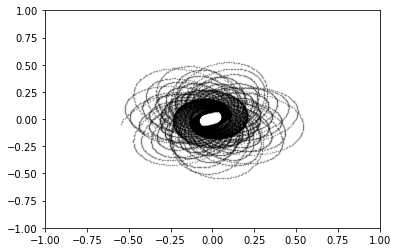

In [21]:
plt.scatter(df["X"], df["Z"], s=0.5, alpha=0.3,color="black")
plt.xlim(-1,1)
plt.ylim(-1,1)

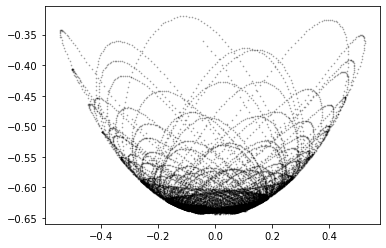

In [22]:
plt.scatter(df["Z"], df["Y"], s=0.5, alpha=0.3,color="black")

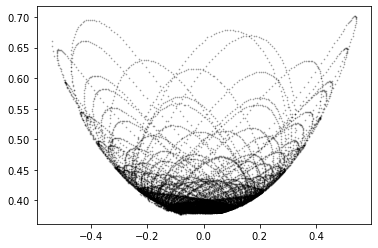

In [23]:
plt.scatter(df["Pendulum_X"],df["Pendulum_Y"], s=0.5, alpha=0.3,color="black")

## 3D-Plot

In [24]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation
import matplotlib as mpl

In [26]:
%matplotlib qt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlim3d(-1, 1)
ax.set_ylim3d(-1, 1)
ax.set_zlim3d(-1, 1)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

ax.scatter(df['X'], df['Z'], df['Y'], s=0.4, color="black")

